In [15]:
import scipy
import pylab
import numpy as np
import matplotlib
import astropy.io.fits as fits

from astropy.nddata import Cutout2D
from astropy.wcs import WCS

from reproject import reproject_interp

from matplotlib.colors import ListedColormap

# Suppress warnings we don't care about:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
%matplotlib inline

In [16]:
#Reproject ALMA data to match HST data

cropfile = 'Region7_190_cutout.fits'
crop = fits.open(cropfile,ignore_missing_end=True)

HNCfile = 'HNC.maximum.fits'
HNC1 = fits.open(HNCfile)

HNCfile = 'HNC.integrated.fits'
HNC2 = fits.open(HNCfile)

HNCfile = 'HNC.masked.maximum.fits'
HNC3 = fits.open(HNCfile)

HNCfile = 'HNC.masked.integrated.fits'
HNC4 = fits.open(HNCfile)

HNCfile = 'HNC.weighted_coord.fits'
HNC5 = fits.open(HNCfile)


array1, footprint1 = reproject_interp(HNC1[0], crop[0].header)
array2, footprint2 = reproject_interp(HNC2[0], crop[0].header)
array3, footprint3 = reproject_interp(HNC3[0], crop[0].header)
array4, footprint4 = reproject_interp(HNC4[0], crop[0].header)
array5, footprint5 = reproject_interp(HNC5[0], crop[0].header)

fits.writeto('HNC.maximum.reproject.fits',array1,crop[0].header,overwrite=True)
fits.writeto('HNC.integrated.reproject.fits',array2,crop[0].header,overwrite=True)
fits.writeto('HNC.masked.maximum.reproject.fits',array3,crop[0].header,overwrite=True)
fits.writeto('HNC.masked.integrated.reproject.fits',array4,crop[0].header,overwrite=True)
fits.writeto('HNC.weighted_coord.reproject.fits',array5,crop[0].header,overwrite=True)

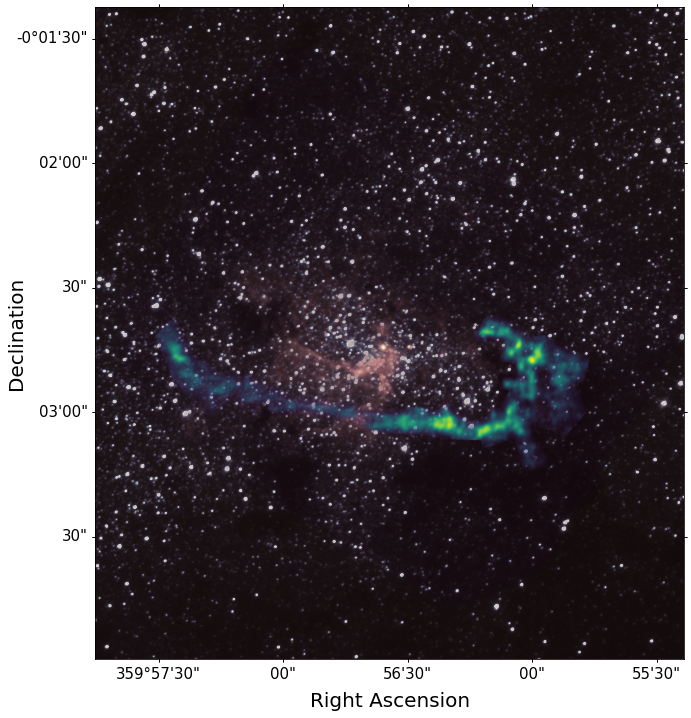

In [17]:
#Make layered image

starfile = 'Region7_190_cutout.fits'
stars = fits.open(starfile,ignore_missing_end=True)
header = fits.getheader(starfile)
w1 = WCS(header) 

gasfile = 'HNC.masked.integrated.reproject.fits'
gas = fits.open(gasfile)

hiifile = 'Region7_palpha_cutout.fits'
hii = fits.open(hiifile,ignore_missing_end=True)

#Transparent color map 
#1- Grab a named color map
cmap = pylab.cm.viridis #pylab.cm.copper 
#2- Define a new color map array
my_cmap = cmap(np.arange(cmap.N))
#3- Define a varying transparency for the color map
# Make the smallest values the most transparent
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
#4- Create a new named colormap that you can call when plotting
my_copper = ListedColormap(my_cmap)


pink = pylab.cm.pink
my_pink = pink(np.arange(pink.N)) 
my_pink[:,-1] = np.linspace(0, 1, pink.N)
my_pink = ListedColormap(my_pink)

pylab.figure(1,figsize=(12,12))
ax1 = pylab.subplot(projection=w1)   
RA = ax1.coords[0]
Dec = ax1.coords[1]
#For plotting with a transparent color map, I normalize images to have a max value of 1
pylab.imshow(stars[0].data,vmax=5,vmin=0,cmap='bone')
pylab.imshow(hii[0].data/np.nanmax(hii[0].data),cmap=my_pink)
pylab.imshow(hii[0].data/np.nanmax(hii[0].data),cmap=my_pink)
pylab.imshow(hii[0].data/np.nanmax(hii[0].data),cmap=my_pink)
pylab.imshow(hii[0].data/np.nanmax(hii[0].data),cmap=my_pink)
pylab.imshow(hii[0].data/np.nanmax(hii[0].data),cmap=my_pink)
pylab.imshow(gas[0].data/np.nanmax(gas[0].data),cmap=my_copper)
pylab.imshow(gas[0].data/np.nanmax(gas[0].data),cmap=my_copper)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)  # Increase the font of the tick labels
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)           # Label the x-axis
pylab.ylabel('Declination',fontsize=20,labelpad=0)               # Label the y-axis

pylab.savefig('CND_overlay_v4.pdf')

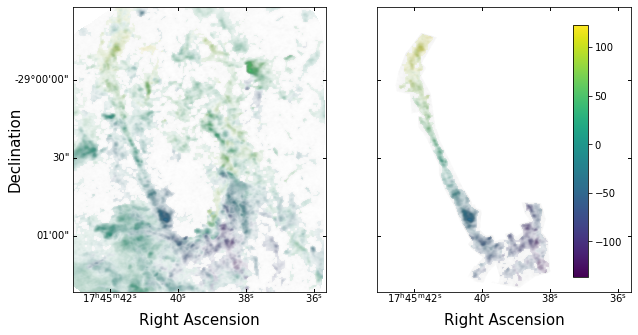

In [70]:
bgfile = 'HNC.maximum.fits'
file = 'HNC.weighted_coord.fits'
bgmaskfile = 'HNC.masked.maximum.fits'
maskfile = 'HNC.masked.weighted_coord.fits'


HNC = fits.open(file)
bgHNC = fits.open(bgfile)
mask = fits.open(maskfile)
bgmask = fits.open(bgmaskfile)

HNCheader = fits.getheader(file)
w2 = WCS(HNCheader) 

#transparent color map #1
greys = pylab.cm.Greys
my_greys = greys(np.arange(greys.N)) 
my_greys[:,-1] = np.linspace(1,0, greys.N)
my_greys = ListedColormap(my_greys)

fig = pylab.figure(1,figsize=(10,7))

ax1 = pylab.subplot(1,2,1,projection=w2)
pylab.imshow(HNC[0].data,cmap='viridis')
pylab.imshow(bgHNC[0].data/np.nanmax(bgHNC[0].data),cmap=my_greys)
pylab.xlim(250,740)
pylab.ylim(250,800)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)  
RA = ax1.coords[0]
Dec = ax1.coords[1]
RA.set_ticks(direction='in')                                                                                      
Dec.set_ticks(direction='in')
pylab.xlabel('Right Ascension',fontsize=15,labelpad=1)           
pylab.ylabel('Declination',fontsize=15,labelpad=0)   

ax2 = pylab.subplot(1,2,2, projection=w2)
im2= pylab.imshow(mask[0].data,cmap='viridis')
#cb=pylab.colorbar(im2,fraction=0.046,pad=0.04) # Define a color bar
pylab.imshow(bgmask[0].data/np.nanmax(bgmask[0].data),cmap=my_greys)
pylab.xlim(250,740)
pylab.ylim(250,800)
RA = ax2.coords[0]
Dec = ax2.coords[1]
ax2.tick_params(axis = 'x', which = 'major', labelsize = 10) 
ax2.tick_params(axis = 'y', which = 'major', labelleft=False) 
RA.set_ticks(direction='in')                                                                                      
Dec.set_ticks(direction='in')
pylab.xlabel('Right Ascension',fontsize=15,labelpad=1)   

cax = fig.add_axes([0.82,0.25, 0.02, 0.5])
cb = pylab.colorbar(im2,orientation='vertical',cax=cax)



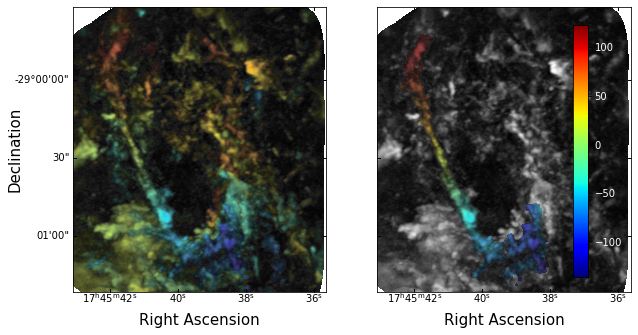

In [72]:

#transparent color map #2
gray = pylab.cm.gray
my_gray = gray(np.arange(gray.N)) 
my_gray[:,-1] = np.linspace(1,0, gray.N)
my_gray = ListedColormap(my_gray)


fig = pylab.figure(1,figsize=(10,7))

ax1 = pylab.subplot(1,2,1,projection=w2)
pylab.imshow(HNC[0].data,cmap='jet')
pylab.imshow(bgHNC[0].data/np.nanmax(bgHNC[0].data),cmap=my_gray)
pylab.xlim(250,740)
pylab.ylim(250,800)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)  
RA = ax1.coords[0]
Dec = ax1.coords[1]
RA.set_ticks(direction='in')                                                                                      
Dec.set_ticks(direction='in')
pylab.xlabel('Right Ascension',fontsize=15,labelpad=1)           
pylab.ylabel('Declination',fontsize=15,labelpad=0)   

ax2 = pylab.subplot(1,2,2, projection=w2)
im2= pylab.imshow(mask[0].data,cmap='jet')
pylab.imshow(bgHNC[0].data/np.nanmax(bgHNC[0].data),cmap=my_gray)
pylab.xlim(250,740)
pylab.ylim(250,800)
RA = ax2.coords[0]
Dec = ax2.coords[1]
ax2.tick_params(axis = 'x', which = 'major', labelsize = 10) 
ax2.tick_params(axis = 'y', which = 'major', labelleft=False) 
RA.set_ticks(direction='in')                                                                                      
Dec.set_ticks(direction='in')
pylab.xlabel('Right Ascension',fontsize=15,labelpad=1)   

cax = fig.add_axes([0.82,0.25, 0.02, 0.5])
cb = pylab.colorbar(im2,orientation='vertical',cax=cax)
cb.ax.tick_params(labelcolor='white')

